In [142]:
import riskparityportfolio as rp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from sklearn.covariance import LedoitWolf

In [143]:
pred_return = pd.read_csv('资产收益率预测结果.csv', index_col=0, parse_dates=True)
pred_return

,沪深300,中证500,中证1000,大盘价值,小盘成长,恒生指数,中债国债总指数(7-10年)财富指数,南华工业品,标普500,纳斯达克100,布油,十年美债,沪金
2022-10-25,-0.004797,-0.005502,0.016049,0.002415,0.004195,0.004663,0.004342,-0.001237,-0.002261,0.008469,-0.004182,0.002002,-0.009547
2022-10-26,-0.004446,-0.004541,0.017168,0.002127,0.003695,0.003048,0.004040,-0.000360,-0.002143,0.008200,-0.005089,0.001944,-0.009381
2022-10-27,-0.003762,-0.005081,0.018641,0.002092,0.003329,0.002151,0.003591,0.000454,-0.002364,0.008522,-0.006079,0.002007,-0.008649
2022-10-28,-0.004807,-0.005352,0.017960,0.001455,0.002190,0.000983,0.003587,0.002691,-0.001759,0.009198,-0.006930,0.002234,-0.007787
2022-10-31,-0.005806,-0.007311,0.017806,0.000941,0.003082,-0.000077,0.002909,0.001511,-0.002875,0.009499,-0.011238,0.003271,-0.006348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-16,-0.000537,-0.003593,-0.007986,0.001170,-0.000371,-0.007151,0.005394,-0.000151,0.003058,0.012332,-0.032842,0.004388,-0.007591
2025-05-19,-0.000829,-0.004045,-0.005751,0.000499,-0.000099,-0.006661,0.002960,0.003156,0.002628,0.013886,-0.030720,0.004047,-0.007505
2025-05-20,-0.004276,-0.006748,-0.006448,0.002635,-0.002280,-0.009386,0.002371,0.006697,-0.003460,0.014754,-0.030120,0.004492,-0.009977
2025-05-21,-0.006232,-0.008732,-0.005302,0.004244,-0.003025,-0.011144,0.001781,0.006780,-0.005395,0.016007,-0.029182,0.003891,-0.012005


In [144]:
pred_vol = pd.read_csv('资产波动率预测结果.csv', index_col=0, parse_dates=True)
pred_vol = pred_vol.iloc[:, [0, 5, 6, 7, 9, 10, 11, 12]]
pred_vol

,沪深300,恒生指数,中债国债总指数(7-10年)财富指数,南华工业品,纳斯达克100,布油,十年美债,沪金
2022-10-25,0.012112,0.010815,0.001381,0.010262,0.010476,0.016408,0.003201,0.007354
2022-10-26,0.012208,0.010811,0.001381,0.010262,0.010367,0.016306,0.003201,0.007365
2022-10-27,0.012390,0.010850,0.001381,0.010262,0.010327,0.016391,0.003205,0.007397
2022-10-28,0.012548,0.010930,0.001381,0.010262,0.010389,0.016649,0.003208,0.007435
2022-10-31,0.012784,0.011366,0.001381,0.010262,0.010584,0.017300,0.003207,0.007508
...,...,...,...,...,...,...,...,...
2025-05-16,0.011340,0.010852,0.001381,0.010262,0.010868,0.016709,0.003201,0.007915
2025-05-19,0.011364,0.010648,0.001381,0.010262,0.011114,0.016630,0.003201,0.008176
2025-05-20,0.011461,0.010636,0.001381,0.010262,0.011248,0.016803,0.003201,0.008207
2025-05-21,0.011777,0.010631,0.001381,0.010262,0.011239,0.017292,0.003201,0.008185


In [145]:
pred_corr = pd.read_csv('资产相关性预测结果.csv', index_col=0, parse_dates=True)
pred_corr

,恒生指数_收益率-沪深300_收益率,中债国债总指数(7-10年)财富指数_收益率-沪深300_收益率,中债国债总指数(7-10年)财富指数_收益率-恒生指数_收益率,南华工业品_收益率-沪深300_收益率,南华工业品_收益率-恒生指数_收益率,南华工业品_收益率-中债国债总指数(7-10年)财富指数_收益率,纳斯达克100_收益率-沪深300_收益率,纳斯达克100_收益率-恒生指数_收益率,纳斯达克100_收益率-中债国债总指数(7-10年)财富指数_收益率,纳斯达克100_收益率-南华工业品_收益率,...,十年美债_收益率-南华工业品_收益率,十年美债_收益率-纳斯达克100_收益率,十年美债_收益率-布油_收益率,沪金_收益率-沪深300_收益率,沪金_收益率-恒生指数_收益率,沪金_收益率-中债国债总指数(7-10年)财富指数_收益率,沪金_收益率-南华工业品_收益率,沪金_收益率-纳斯达克100_收益率,沪金_收益率-布油_收益率,沪金_收益率-十年美债_收益率
2022-10-25,0.338671,-0.011504,-0.022877,0.143933,0.164138,-0.022211,0.083370,0.106183,-0.024674,0.007820,...,-0.042155,-0.086671,-0.062656,-0.051840,-0.050574,-0.005454,0.022116,-0.028187,-0.029262,-0.002383
2022-10-26,0.336114,-0.012269,-0.023879,0.141609,0.160974,-0.023106,0.082157,0.104804,-0.025429,0.007834,...,-0.042642,-0.087444,-0.063410,-0.053723,-0.053123,-0.005813,0.018227,-0.029401,-0.030678,-0.002842
2022-10-27,0.333183,-0.012999,-0.025087,0.138103,0.157058,-0.024111,0.080507,0.102655,-0.026273,0.007103,...,-0.043279,-0.088211,-0.064102,-0.055617,-0.056231,-0.006342,0.013877,-0.031280,-0.032593,-0.003321
2022-10-28,0.329699,-0.013689,-0.026322,0.134600,0.153459,-0.025157,0.078312,0.099665,-0.027016,0.006018,...,-0.043866,-0.088972,-0.064668,-0.056804,-0.059229,-0.006850,0.009904,-0.033129,-0.034527,-0.003781
2022-10-31,0.326615,-0.014087,-0.027244,0.132548,0.151827,-0.025824,0.075834,0.096871,-0.027032,0.005273,...,-0.043948,-0.089248,-0.064294,-0.055973,-0.060809,-0.007087,0.007677,-0.033972,-0.035678,-0.003873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-16,0.355326,-0.014827,-0.016655,0.214947,0.222628,-0.020673,0.077817,0.120891,-0.013997,0.035682,...,-0.036379,-0.100278,-0.069886,-0.017555,-0.003983,0.000180,0.077762,-0.001123,-0.002968,-0.006536
2025-05-19,0.351035,-0.015510,-0.018036,0.211353,0.219574,-0.021800,0.076040,0.117842,-0.014765,0.036005,...,-0.036992,-0.101366,-0.071847,-0.017264,-0.006124,-0.000484,0.072625,-0.001993,-0.005251,-0.006802
2025-05-20,0.347143,-0.016127,-0.019310,0.207957,0.216775,-0.022806,0.074434,0.115095,-0.015443,0.036115,...,-0.037562,-0.102387,-0.073523,-0.017140,-0.008253,-0.001136,0.067851,-0.002801,-0.007371,-0.007058
2025-05-21,0.343632,-0.016690,-0.020464,0.205023,0.214392,-0.023697,0.072983,0.112645,-0.016030,0.036138,...,-0.038056,-0.103397,-0.075038,-0.016927,-0.010100,-0.001762,0.063553,-0.003492,-0.009287,-0.007315


In [146]:
def reconstruct_correlation_matrix(target):
    # 计算原始矩阵的维度
    n = 8
    
    # 创建一个全零矩阵
    matrix = np.zeros((n, n))
    
    # 获取下三角部分（不包含对角线）的索引
    tril_indices = np.tril_indices(n, k=-1)
    
    # 将目标元素填充到下三角部分
    matrix[tril_indices] = target
    
    # 复制下三角部分到上三角部分（转置）
    matrix = matrix + matrix.T
    
    # 在对角线上填充1
    np.fill_diagonal(matrix, 1)
    
    return matrix

In [147]:
corr_series = []
for i in range(len(pred_corr)):
    corr = reconstruct_correlation_matrix(np.array(pred_corr.iloc[i, :]))
    corr_series.append(corr)

corr_series = np.array(corr_series)

In [148]:
corr_series.shape

(624, 8, 8)

In [149]:
corr_series[-1, :, :]

array([[ 1.        ,  0.34039593, -0.01719941,  0.2022002 ,  0.0715874 ,
         0.05959117, -0.02845319, -0.0168248 ],
       [ 0.34039593,  1.        , -0.02153269,  0.21213159,  0.11034629,
         0.06306154, -0.05317362, -0.0119549 ],
       [-0.01719941, -0.02153269,  1.        , -0.02450173, -0.01655607,
        -0.00862942, -0.00177125, -0.00237251],
       [ 0.2022002 ,  0.21213159, -0.02450173,  1.        ,  0.0359749 ,
         0.07094467, -0.03852138,  0.05949255],
       [ 0.0715874 ,  0.11034629, -0.01655607,  0.0359749 ,  1.        ,
         0.1374499 , -0.10432766, -0.00422902],
       [ 0.05959117,  0.06306154, -0.00862942,  0.07094467,  0.1374499 ,
         1.        , -0.07634529, -0.01115728],
       [-0.02845319, -0.05317362, -0.00177125, -0.03852138, -0.10432766,
        -0.07634529,  1.        , -0.00757859],
       [-0.0168248 , -0.0119549 , -0.00237251,  0.05949255, -0.00422902,
        -0.01115728, -0.00757859,  1.        ]])

In [150]:
cov_series = []
for i in range(len(corr_series)):
    volatilities = np.asarray(pred_vol.iloc[i, :])
    corr = corr_series[i, :, :]
    cov_matrix = np.diag(volatilities) @ corr @ np.diag(volatilities)
    cov_series.append(cov_matrix)

In [151]:
cov_series = pd.Series(cov_series, index=pred_vol.index)

In [152]:
cov_series.index

DatetimeIndex(['2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03',
               '2022-11-04', '2022-11-07',
               ...
               '2025-05-09', '2025-05-12', '2025-05-13', '2025-05-14',
               '2025-05-15', '2025-05-16', '2025-05-19', '2025-05-20',
               '2025-05-21', '2025-05-22'],
              dtype='datetime64[ns]', length=624, freq=None)

In [153]:
cov_series.iloc[-1]

array([[ 1.47822776e-04,  4.39715560e-05, -2.88741092e-07,
         2.52277545e-05,  9.66454471e-06,  1.28636451e-05,
        -1.10741272e-06, -1.67209402e-06],
       [ 4.39715560e-05,  1.12884314e-04, -3.15892470e-07,
         2.31285542e-05,  1.30181325e-05,  1.18957767e-05,
        -1.80850994e-06, -1.03825201e-06],
       [-2.88741092e-07, -3.15892470e-07,  1.90655148e-06,
        -3.47174102e-07, -2.53837472e-07, -2.11552058e-07,
        -7.82910338e-09, -2.67776771e-08],
       [ 2.52277545e-05,  2.31285542e-05, -3.47174102e-07,
         1.05305894e-04,  4.09920872e-06,  1.29258040e-05,
        -1.26542389e-06,  4.99032729e-06],
       [ 9.66454471e-06,  1.30181325e-05, -2.53837472e-07,
         4.09920872e-06,  1.23295796e-04,  2.70975479e-05,
        -3.70835681e-06, -3.83843431e-07],
       [ 1.28636451e-05,  1.18957767e-05, -2.11552058e-07,
         1.29258040e-05,  2.70975479e-05,  3.15226602e-04,
        -4.33911916e-06, -1.61923567e-06],
       [-1.10741272e-06, -1.808509

In [154]:
# 资产数据加载和预处理
# 从Excel加载三类资产数据：指数、R007和期货
indices = pd.read_excel('资产池行情数据.xlsx', sheet_name='指数数据', header=0, index_col=0, parse_dates=True)
r007 = pd.read_excel('资产池行情数据.xlsx', sheet_name='R007数据', header=0, index_col=0, parse_dates=True)
futures = pd.read_excel('资产池行情数据.xlsx', sheet_name='期货类数据', header=0, index_col=0, parse_dates=True)

# 数据预处理
# 计算R007日化收益率
annual_coef = 1 / 365  # 年化系数
r007 = ((1 + r007['R007'] / 100) ** annual_coef - 1).rename('R007_收益率')

# 移除期货数据中的缺失值
futures.dropna(inplace=True, how='any')

# 内连接所有资产数据
assets = pd.merge(indices, futures, how='inner', left_index=True, right_index=True)

In [155]:
# 计算对数收益率
log_returns = pd.DataFrame()
for column in assets.columns:
    log_returns[f'{column}_收益率'] = np.log(assets[column] / assets[column].shift(1))

asset_returns = log_returns.dropna()
asset_returns = asset_returns.iloc[:, [0, 5, 6, 7, 9, 10, 11, 12]]

In [156]:
asset_returns

,沪深300_收益率,恒生指数_收益率,中债国债总指数(7-10年)财富指数_收益率,南华工业品_收益率,纳斯达克100_收益率,布油_收益率,十年美债_收益率,沪金_收益率
2008-01-10,0.010349,-0.014039,-0.000681,-0.008283,0.002275,-0.023046,-0.005700,-0.031918
2008-01-11,0.004748,-0.013452,0.001284,0.009710,-0.021121,-0.012549,0.005429,0.000505
2008-01-14,0.005706,-0.014958,0.000014,0.000263,0.018820,0.020110,0.000541,0.006818
2008-01-15,-0.006179,-0.024104,0.000280,-0.009207,-0.028655,-0.019410,0.005128,0.017315
2008-01-16,-0.034056,-0.055173,0.000343,-0.023331,-0.011576,-0.014641,-0.000539,-0.025420
...,...,...,...,...,...,...,...,...
2025-05-16,-0.004647,-0.004620,-0.000715,-0.008987,0.004308,0.013545,0.000708,0.008844
2025-05-19,-0.003075,-0.000528,0.001080,0.000813,0.000891,0.001985,-0.001701,-0.001464
2025-05-20,0.005408,0.014837,0.000583,-0.001614,-0.003722,-0.002444,0.000567,0.007299
2025-05-21,0.004661,0.006159,-0.000308,0.005664,-0.013523,-0.007215,-0.006401,0.018889


In [157]:
# 初始化滚动再平衡策略的变量
rolling_cumulative_returns = [1]  # 初始累计收益为1
rolling_monthly_returns = []  # 存储每月的非累计收益
rolling_weights = []  # 存储每个再平衡周期的权重
start_date = cov_series.index.min()# 再平衡的起始日期
end_date = cov_series.index.max()  # 数据的结束日期
budget = [1/9, 1/9, 1/6, 1/9, 1/9, 1/9, 1/6, 1/9]  # 风险预算分配
balancing_dates = []  # 存储再平衡日期

In [158]:
len(cov_series)

624

In [159]:
current_date = start_date
# 执行滚动月度再平衡
while current_date <= end_date:
    balancing_dates.append(current_date)  # 记录再平衡日期
   
    # 计算回溯期的协方差矩阵
    cov_pred = cov_series.loc[current_date]

    # 计算回溯期的风险平价权重
    portfolio_lookback = rp.RiskParityPortfolio(covariance=cov_pred, budget=budget)
    portfolio_lookback.design()
    weights_lookback = portfolio_lookback.weights
    rolling_weights.append(weights_lookback)

    # 计算当前月的组合收益
    current_idx = asset_returns.index.get_loc(current_date)
    month_log_returns = asset_returns.iloc[current_idx-19:current_idx+1, :]  # 获取当前日期前20天的收益率
    current_month_portfolio_returns = month_log_returns.dot(weights_lookback)

    # 更新累计收益和非累计收益
    for ret in current_month_portfolio_returns:
        rolling_monthly_returns.append(ret)  # 添加非累计收益
        rolling_cumulative_returns.append(rolling_cumulative_returns[-1] * (1 + ret))

    # 移动到下一个月
    try:
        current_date = cov_series.index[cov_series.index.get_loc(current_date) + 20]
    except IndexError:
        break

  0%|          | 1/500 [00:00<00:19, 26.14it/s]


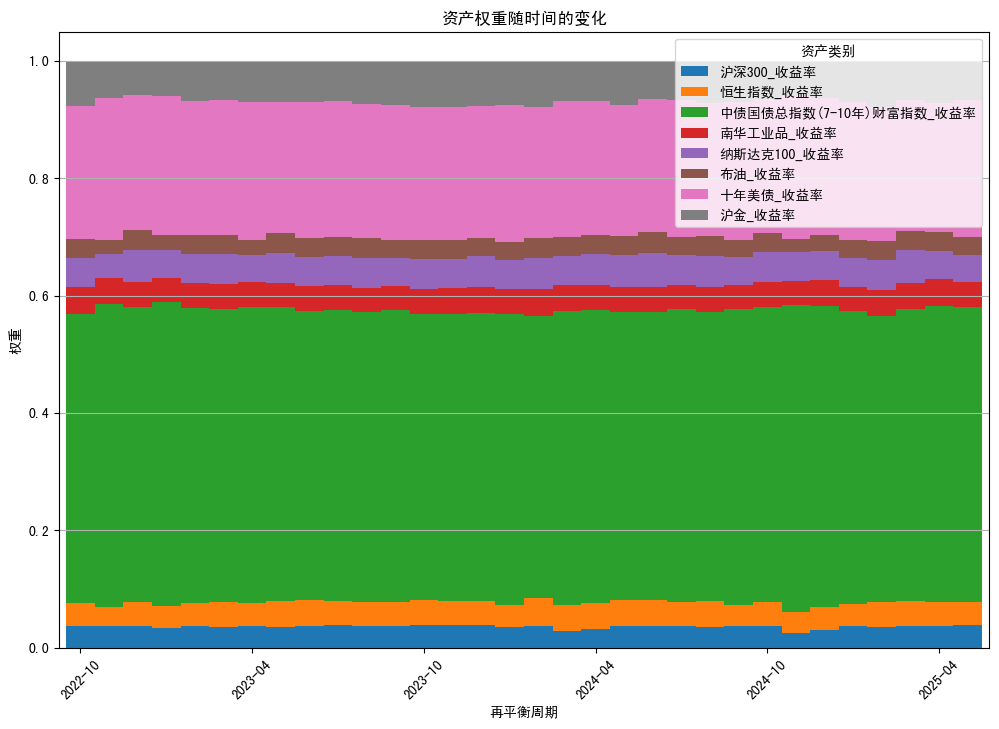

In [160]:
# 将滚动权重转换为DataFrame并设置索引为再平衡日期
rolling_weights = pd.DataFrame(rolling_weights, columns=asset_returns.columns)
rolling_weights.index = balancing_dates

# 使用堆叠柱状图可视化资产权重随时间的变化
plt.rcParams['font.family'] = 'SimHei'  # 设置中文字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

rolling_weights.plot(kind='bar', stacked=True, figsize=(12, 8), width=1)

plt.title('资产权重随时间的变化')
plt.xlabel('再平衡周期')
plt.ylabel('权重')
plt.legend(title='资产类别')
plt.grid(axis='y')

# 调整x轴刻度以显示每隔n个标签
plt.xticks(ticks=range(0, len(rolling_weights.index), 6), labels=rolling_weights.index[::6].strftime('%Y-%m'), rotation=45)

plt.show()

In [161]:
# 将非累计收益转换为pandas Series
start_idx = asset_returns.index.get_loc(start_date) - 19
rolling_monthly_returns = pd.Series(rolling_monthly_returns, index=asset_returns.iloc[start_idx:start_idx+640, :].index)
rolling_monthly_returns

2022-09-21   -0.000535
2022-09-22   -0.003790
2022-09-23   -0.003802
2022-09-26   -0.006356
2022-09-27    0.000613
                ...   
2025-05-13   -0.000869
2025-05-14    0.001836
2025-05-15   -0.002642
2025-05-16    0.000253
2025-05-19    0.000045
Length: 640, dtype: float64

In [162]:
rolling_cumulative_returns = pd.Series(
    rolling_cumulative_returns[1:],
    index=asset_returns.iloc[start_idx:start_idx+640, :].index  # Match index length
)
rolling_cumulative_returns.iloc[0] = 1  # 确保初始值为1
rolling_cumulative_returns

2022-09-21    1.000000
2022-09-22    0.995678
2022-09-23    0.991892
2022-09-26    0.985588
2022-09-27    0.986192
                ...   
2025-05-13    1.146535
2025-05-14    1.148639
2025-05-15    1.145605
2025-05-16    1.145894
2025-05-19    1.145946
Length: 640, dtype: float64

In [163]:
# 复制对数收益率并添加组合收益列
log_returns = asset_returns.loc[rolling_monthly_returns.index[0]:rolling_monthly_returns.index[-1]].copy()
log_returns['portfolio'] = rolling_monthly_returns
log_returns

,沪深300_收益率,恒生指数_收益率,中债国债总指数(7-10年)财富指数_收益率,南华工业品_收益率,纳斯达克100_收益率,布油_收益率,十年美债_收益率,沪金_收益率,portfolio
2022-09-21,-0.007427,-0.018095,0.000695,0.010613,-0.018200,-0.006734,0.003425,-0.000208,-0.000535
2022-09-22,-0.008849,-0.016215,0.000139,0.006611,-0.011767,0.008187,-0.013079,0.001348,-0.003790
2022-09-23,-0.003449,-0.011900,-0.001030,-0.006509,-0.016694,-0.051570,-0.001109,0.004292,-0.003802
2022-09-26,-0.005029,-0.004366,-0.001969,-0.018550,-0.005064,-0.025852,-0.011301,-0.007043,-0.006356
2022-09-27,0.014392,0.000290,-0.000295,0.010113,0.001566,0.023968,-0.004218,-0.001508,0.000613
...,...,...,...,...,...,...,...,...,...
2025-05-13,0.001451,-0.018912,0.000914,-0.004048,0.015669,0.025383,-0.001704,-0.023126,-0.000869
2025-05-14,0.011979,0.022777,-0.000107,0.020562,0.005716,-0.008137,-0.002276,0.002279,0.001836
2025-05-15,-0.009175,-0.007962,-0.000362,-0.012933,0.000779,-0.023887,0.004830,-0.025255,-0.002642
2025-05-16,-0.004647,-0.004620,-0.000715,-0.008987,0.004308,0.013545,0.000708,0.008844,0.000253


In [164]:
# 计算每个资产类别和组合的累计收益
cumulative_returns_assets = (1 + log_returns).cumprod()
cumulative_returns_assets['portfolio'] = rolling_cumulative_returns
cumulative_returns_assets

,沪深300_收益率,恒生指数_收益率,中债国债总指数(7-10年)财富指数_收益率,南华工业品_收益率,纳斯达克100_收益率,布油_收益率,十年美债_收益率,沪金_收益率,portfolio
2022-09-21,0.992573,0.981905,1.000695,1.010613,0.981800,0.993266,1.003425,0.999792,1.000000
2022-09-22,0.983790,0.965983,1.000834,1.017294,0.970247,1.001398,0.990301,1.001141,0.995678
2022-09-23,0.980397,0.954488,0.999802,1.010672,0.954050,0.949756,0.989203,1.005438,0.991892
2022-09-26,0.975466,0.950320,0.997834,0.991924,0.949219,0.925203,0.978024,0.998357,0.985588
2022-09-27,0.989505,0.950595,0.997540,1.001955,0.950706,0.947379,0.973898,0.996851,0.986192
...,...,...,...,...,...,...,...,...,...
2025-05-13,0.950759,1.128770,1.153648,0.921712,1.677709,0.825175,0.956962,1.872794,1.146535
2025-05-14,0.962147,1.154480,1.153525,0.940664,1.687298,0.818460,0.954784,1.877062,1.148639
2025-05-15,0.953320,1.145288,1.153107,0.928498,1.688612,0.798909,0.959396,1.829657,1.145605
2025-05-16,0.948890,1.139996,1.152283,0.920153,1.695888,0.809730,0.960076,1.845839,1.145894


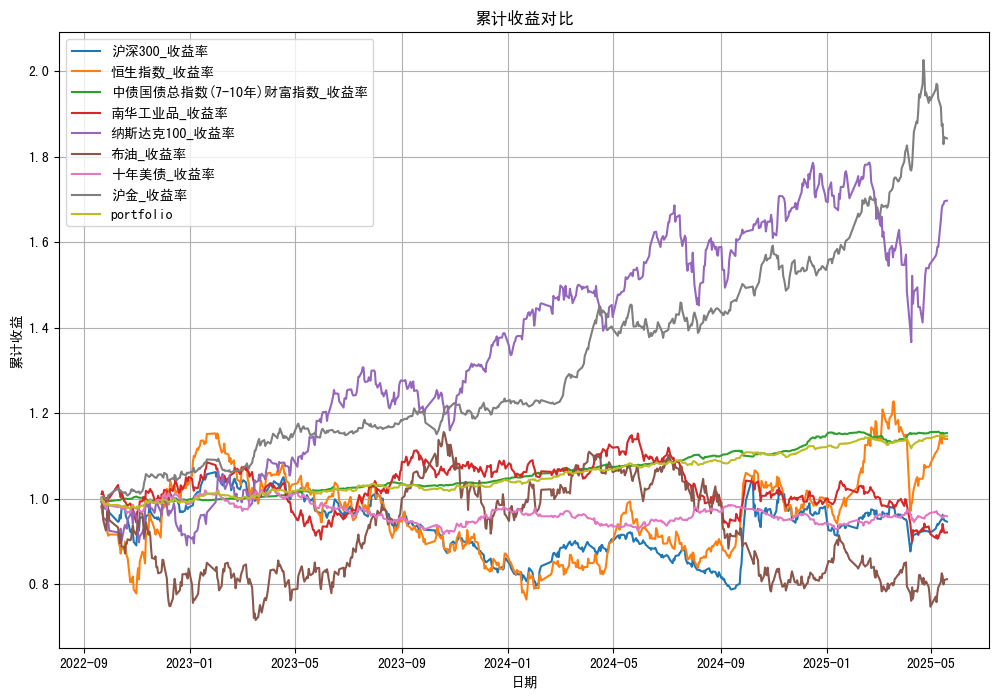

In [165]:
# 绘制每个资产类别和组合的累计收益对比图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for column in cumulative_returns_assets.columns:
    plt.plot(cumulative_returns_assets.index, cumulative_returns_assets[column], label=column)

plt.title('累计收益对比')
plt.xlabel('日期')
plt.ylabel('累计收益')
plt.legend()
plt.grid()
plt.show()

In [166]:
# 定义函数以计算组合绩效指标
def calculate_metrics(log_returns, cumulative_returns, risk_free_rate):
    sharpe_ratio = (log_returns.mean() - risk_free_rate) / log_returns.std() * np.sqrt(252)  # 夏普比率
    rolling_max = cumulative_returns.cummax()  # 滚动最大值
    drawdown = (cumulative_returns - rolling_max) / rolling_max  # 回撤
    max_drawdown = drawdown.min()  # 最大回撤
    total_return = cumulative_returns.iloc[-1] - 1  # 总收益
    num_years = len(cumulative_returns) / 252  # 年数
    annualized_return = (1 + total_return) ** (1 / num_years) - 1  # 年化收益
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else float('inf')  # Calmar比率
    return sharpe_ratio, max_drawdown, annualized_return, calmar_ratio

In [177]:
# 定义无风险利率（例如1.5%年化）
risk_free_rate = 0.015 / 252

# 计算每个资产和组合的绩效指标
metrics = []
for column in cumulative_returns_assets.columns:
    sharpe_ratio, max_drawdown, annualized_return, calmar_ratio = calculate_metrics(
        log_returns[column], cumulative_returns_assets[column], risk_free_rate
    )
    metrics.append({
        '资产': column,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        '年化收益': annualized_return,
        'Calmar比率': calmar_ratio
    })

# 将指标转换为DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

,资产,夏普比率,最大回撤,年化收益,Calmar比率
0,沪深300_收益率,-0.114140,-0.258846,-0.021632,-0.083571
1,恒生指数_收益率,0.270795,-0.337605,0.052726,0.156177
2,中债国债总指数(7-10年)财富指数_收益率,2.102771,-0.022298,0.057849,2.594340
3,南华工业品_收益率,-0.234257,-0.219475,-0.031925,-0.145462
4,纳斯达克100_收益率,0.971325,-0.235337,0.231622,0.984214
5,布油_收益率,-0.198471,-0.353638,-0.079024,-0.223461
6,十年美债_收益率,-0.423350,-0.102599,-0.016574,-0.161542
7,沪金_收益率,2.055816,-0.097155,0.272223,2.801934
8,portfolio,1.224205,-0.033719,0.064150,1.902502


In [168]:
# 初始化滚动再平衡策略的变量
rolling_cumulative_returns = [1]  # 初始累计收益为1
rolling_monthly_returns = []  # 存储每月的非累计收益
rolling_weights = []  # 存储每个再平衡周期的权重
start_date = cov_series.index.min()# 再平衡的起始日期
end_date = cov_series.index.max()  # 数据的结束日期
budget = [1/9, 1/9, 1/6, 1/9, 1/9, 1/9, 1/6, 1/9]  # 风险预算分配
balancing_dates = []  # 存储再平衡日期

In [169]:
current_date = start_date
# 执行滚动月度再平衡
while current_date <= end_date:
    balancing_dates.append(current_date)  # 记录再平衡日期
    # 定义回溯期（过去1年）
    lookback_start = current_date - pd.DateOffset(years=1)

    # 计算回溯期的协方差矩阵
    lookback_log_returns = asset_returns.loc[lookback_start:current_date - pd.Timedelta(days=1)]
    # lookback_cov_matrix = lookback_log_returns.cov()
    # sigma_lookback = np.array(lookback_cov_matrix)
    lw = LedoitWolf().fit(lookback_log_returns)
    sigma_lookback = lw.covariance_

    # 计算回溯期的风险平价权重
    portfolio_lookback = rp.RiskParityPortfolio(covariance=sigma_lookback, budget=budget)
    portfolio_lookback.design()
    weights_lookback = portfolio_lookback.weights
    rolling_weights.append(weights_lookback)

    # 计算当前月的组合收益
    current_idx = asset_returns.index.get_loc(current_date)
    month_log_returns = asset_returns.iloc[current_idx-19:current_idx+1, :]  # 获取当前日期前20天的收益率
    current_month_portfolio_returns = month_log_returns.dot(weights_lookback)

    # 更新累计收益和非累计收益
    for ret in current_month_portfolio_returns:
        rolling_monthly_returns.append(ret)  # 添加非累计收益
        rolling_cumulative_returns.append(rolling_cumulative_returns[-1] * (1 + ret))

    # 移动到下一个月
    try:
        current_date = cov_series.index[cov_series.index.get_loc(current_date) + 20]
    except IndexError:
        break

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<00:14, 33.35it/s]


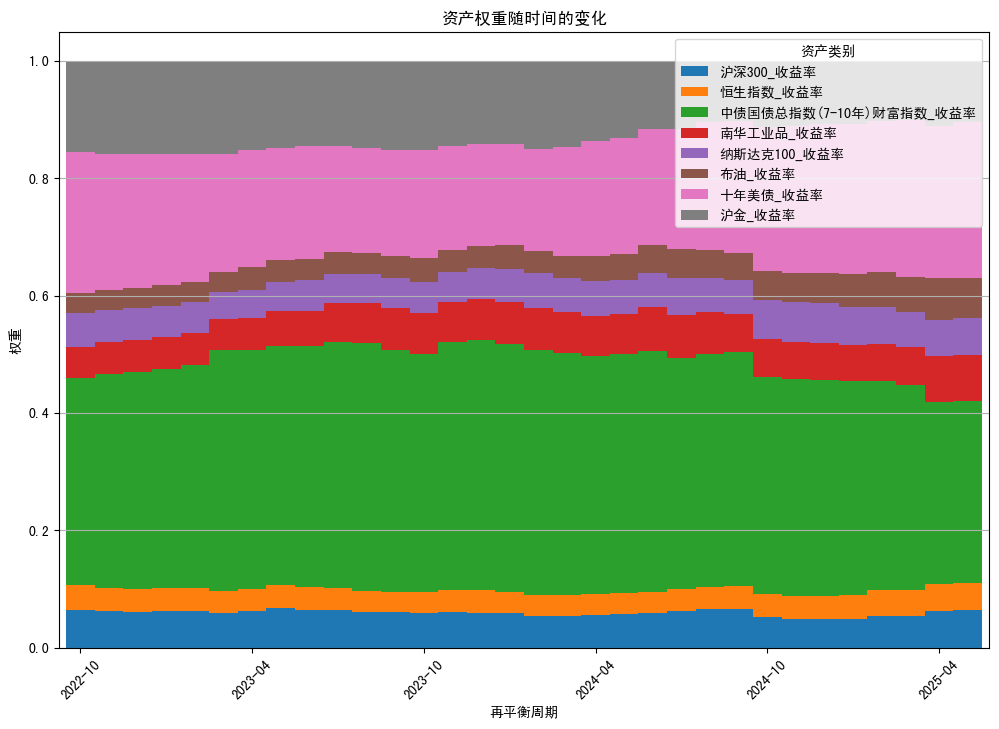

In [170]:
# 将滚动权重转换为DataFrame并设置索引为再平衡日期
rolling_weights = pd.DataFrame(rolling_weights, columns=asset_returns.columns)
rolling_weights.index = balancing_dates

# 使用堆叠柱状图可视化资产权重随时间的变化
plt.rcParams['font.family'] = 'SimHei'  # 设置中文字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

rolling_weights.plot(kind='bar', stacked=True, figsize=(12, 8), width=1)

plt.title('资产权重随时间的变化')
plt.xlabel('再平衡周期')
plt.ylabel('权重')
plt.legend(title='资产类别')
plt.grid(axis='y')

# 调整x轴刻度以显示每隔n个标签
plt.xticks(ticks=range(0, len(rolling_weights.index), 6), labels=rolling_weights.index[::6].strftime('%Y-%m'), rotation=45)

plt.show()

In [171]:
# 将非累计收益转换为pandas Series
start_idx = asset_returns.index.get_loc(start_date) - 19
rolling_monthly_returns = pd.Series(rolling_monthly_returns, index=asset_returns.iloc[start_idx:start_idx+640, :].index)
rolling_monthly_returns

2022-09-21   -0.000957
2022-09-22   -0.004226
2022-09-23   -0.003754
2022-09-26   -0.007157
2022-09-27    0.001002
                ...   
2025-05-13   -0.001005
2025-05-14    0.002864
2025-05-15   -0.005027
2025-05-16    0.000850
2025-05-19   -0.000236
Length: 640, dtype: float64

In [172]:
rolling_cumulative_returns = pd.Series(
    rolling_cumulative_returns[1:],
    index=asset_returns.iloc[start_idx:start_idx+640, :].index  # Match index length
)
rolling_cumulative_returns.iloc[0] = 1  # 确保初始值为1
rolling_cumulative_returns

2022-09-21    1.000000
2022-09-22    0.994821
2022-09-23    0.991087
2022-09-26    0.983993
2022-09-27    0.984979
                ...   
2025-05-13    1.172894
2025-05-14    1.176254
2025-05-15    1.170341
2025-05-16    1.171335
2025-05-19    1.171058
Length: 640, dtype: float64

In [173]:
# 复制对数收益率并添加组合收益列
log_returns = asset_returns.loc[rolling_monthly_returns.index[0]:rolling_monthly_returns.index[-1]].copy()
log_returns['portfolio'] = rolling_monthly_returns
log_returns

,沪深300_收益率,恒生指数_收益率,中债国债总指数(7-10年)财富指数_收益率,南华工业品_收益率,纳斯达克100_收益率,布油_收益率,十年美债_收益率,沪金_收益率,portfolio
2022-09-21,-0.007427,-0.018095,0.000695,0.010613,-0.018200,-0.006734,0.003425,-0.000208,-0.000957
2022-09-22,-0.008849,-0.016215,0.000139,0.006611,-0.011767,0.008187,-0.013079,0.001348,-0.004226
2022-09-23,-0.003449,-0.011900,-0.001030,-0.006509,-0.016694,-0.051570,-0.001109,0.004292,-0.003754
2022-09-26,-0.005029,-0.004366,-0.001969,-0.018550,-0.005064,-0.025852,-0.011301,-0.007043,-0.007157
2022-09-27,0.014392,0.000290,-0.000295,0.010113,0.001566,0.023968,-0.004218,-0.001508,0.001002
...,...,...,...,...,...,...,...,...,...
2025-05-13,0.001451,-0.018912,0.000914,-0.004048,0.015669,0.025383,-0.001704,-0.023126,-0.001005
2025-05-14,0.011979,0.022777,-0.000107,0.020562,0.005716,-0.008137,-0.002276,0.002279,0.002864
2025-05-15,-0.009175,-0.007962,-0.000362,-0.012933,0.000779,-0.023887,0.004830,-0.025255,-0.005027
2025-05-16,-0.004647,-0.004620,-0.000715,-0.008987,0.004308,0.013545,0.000708,0.008844,0.000850


In [174]:
# 计算每个资产类别和组合的累计收益
cumulative_returns_assets = (1 + log_returns).cumprod()
cumulative_returns_assets['portfolio'] = rolling_cumulative_returns
cumulative_returns_assets

,沪深300_收益率,恒生指数_收益率,中债国债总指数(7-10年)财富指数_收益率,南华工业品_收益率,纳斯达克100_收益率,布油_收益率,十年美债_收益率,沪金_收益率,portfolio
2022-09-21,0.992573,0.981905,1.000695,1.010613,0.981800,0.993266,1.003425,0.999792,1.000000
2022-09-22,0.983790,0.965983,1.000834,1.017294,0.970247,1.001398,0.990301,1.001141,0.994821
2022-09-23,0.980397,0.954488,0.999802,1.010672,0.954050,0.949756,0.989203,1.005438,0.991087
2022-09-26,0.975466,0.950320,0.997834,0.991924,0.949219,0.925203,0.978024,0.998357,0.983993
2022-09-27,0.989505,0.950595,0.997540,1.001955,0.950706,0.947379,0.973898,0.996851,0.984979
...,...,...,...,...,...,...,...,...,...
2025-05-13,0.950759,1.128770,1.153648,0.921712,1.677709,0.825175,0.956962,1.872794,1.172894
2025-05-14,0.962147,1.154480,1.153525,0.940664,1.687298,0.818460,0.954784,1.877062,1.176254
2025-05-15,0.953320,1.145288,1.153107,0.928498,1.688612,0.798909,0.959396,1.829657,1.170341
2025-05-16,0.948890,1.139996,1.152283,0.920153,1.695888,0.809730,0.960076,1.845839,1.171335


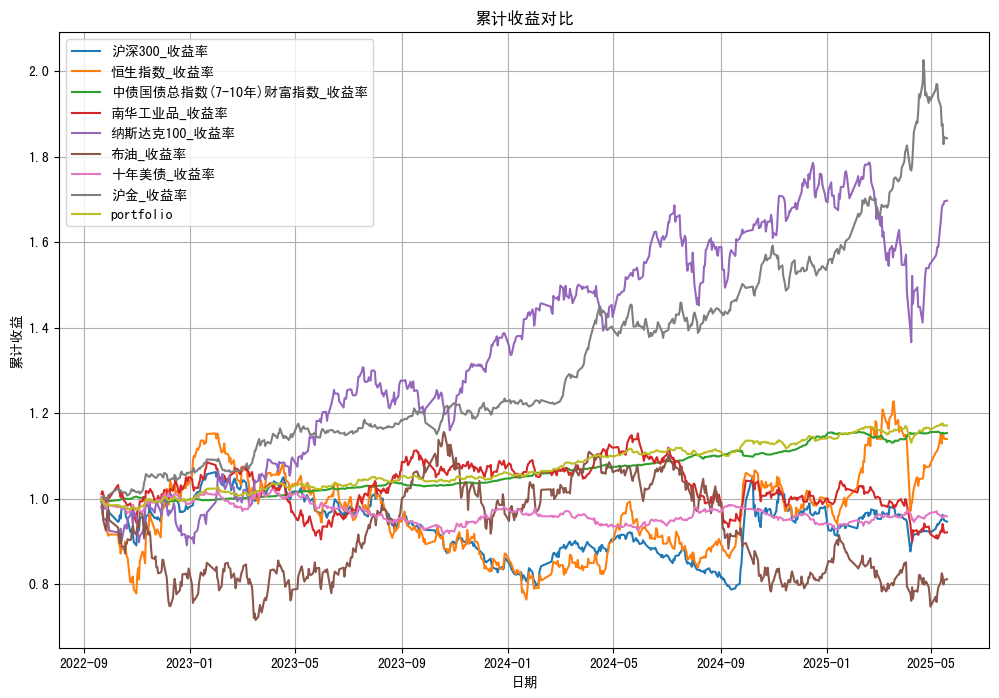

In [175]:
# 绘制每个资产类别和组合的累计收益对比图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for column in cumulative_returns_assets.columns:
    plt.plot(cumulative_returns_assets.index, cumulative_returns_assets[column], label=column)

plt.title('累计收益对比')
plt.xlabel('日期')
plt.ylabel('累计收益')
plt.legend()
plt.grid()
plt.show()

In [176]:
# 定义无风险利率（例如1.5%年化）
risk_free_rate = 0.015 / 252

# 计算每个资产和组合的绩效指标
metrics = []
for column in cumulative_returns_assets.columns:
    sharpe_ratio, max_drawdown, annualized_return, calmar_ratio = calculate_metrics(
        log_returns[column], cumulative_returns_assets[column], risk_free_rate
    )
    metrics.append({
        '资产': column,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        '年化收益': annualized_return,
        'Calmar比率': calmar_ratio
    })

# 将指标转换为DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

,资产,夏普比率,最大回撤,年化收益,Calmar比率
0,沪深300_收益率,-0.114140,-0.258846,-0.021632,-0.083571
1,恒生指数_收益率,0.270795,-0.337605,0.052726,0.156177
2,中债国债总指数(7-10年)财富指数_收益率,2.102771,-0.022298,0.057849,2.594340
3,南华工业品_收益率,-0.234257,-0.219475,-0.031925,-0.145462
4,纳斯达克100_收益率,0.971325,-0.235337,0.231622,0.984214
5,布油_收益率,-0.198471,-0.353638,-0.079024,-0.223461
6,十年美债_收益率,-0.423350,-0.102599,-0.016574,-0.161542
7,沪金_收益率,2.055816,-0.097155,0.272223,2.801934
8,portfolio,1.224205,-0.033719,0.064150,1.902502
